In [13]:
# Verify venv

import sys
print(sys.executable)

/Users/akinsholaakinade/Desktop/ecommerce-delivery-prediction/venv/bin/python


In [14]:
# Verify Python executable path

import os
os.getcwd()

'/Users/akinsholaakinade/Desktop/ecommerce-delivery-prediction'

In [15]:
# Import essential libraries for data analysis, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Make plots appear inside the notebook
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [16]:
# Load the dataset (correct path)

data_path = "data/raw/e_commerce.csv"
df = pd.read_csv(data_path)

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [17]:
# Dataset shape
df.shape

(10999, 12)

In [18]:
# Column names
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [19]:
# Data types
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [20]:
# Clean column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace('.', '_')
)

df.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached_on_time_y_n'],
      dtype='object')

In [21]:
#Before EDA, we must check:
# 1.Missing values
# 2.Duplicate rows

# Check for missing values
df.isnull().sum()

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
reached_on_time_y_n    0
dtype: int64

In [22]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [23]:
# Distribution of the target variable
df['reached_on_time_y_n'].value_counts(normalize=True)

reached_on_time_y_n
1    0.596691
0    0.403309
Name: proportion, dtype: float64

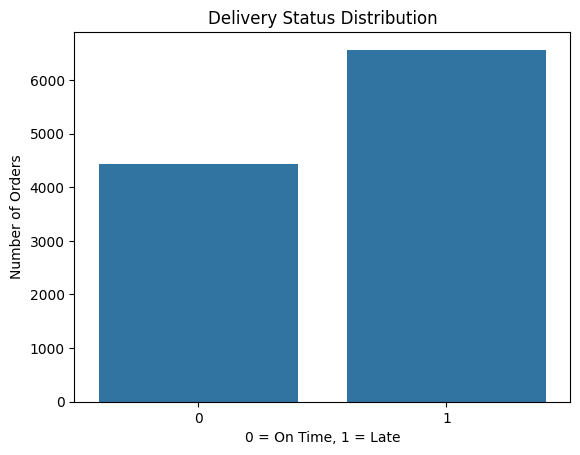

In [24]:
# Visualize target distribution
sns.countplot(x='reached_on_time_y_n', data=df)
plt.title("Delivery Status Distribution")
plt.xlabel("0 = On Time, 1 = Late")
plt.ylabel("Number of Orders")
plt.show()

In [26]:
# Delivery status by shipment mode (proportion of late deliveries)
shipment_delay = (
    df.groupby('mode_of_shipment')['reached_on_time_y_n']
      .mean()
      .sort_values(ascending=False)
)

shipment_delay

mode_of_shipment
Flight    0.601576
Ship      0.597561
Road      0.588068
Name: reached_on_time_y_n, dtype: float64

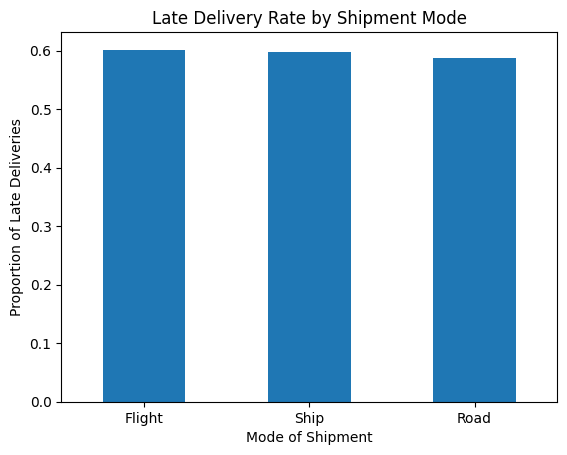

In [28]:
# Visualize late delivery rate by shipment mode
shipment_delay.plot(kind='bar')
plt.title("Late Delivery Rate by Shipment Mode")
plt.ylabel("Proportion of Late Deliveries")
plt.xlabel("Mode of Shipment")
plt.xticks(rotation=0)
plt.show()

In [29]:
# Late delivery rate by product importance
importance_delay = (
    df.groupby('product_importance')['reached_on_time_y_n']
      .mean()
      .sort_values(ascending=False)
)

importance_delay

product_importance
high      0.649789
low       0.592788
medium    0.590450
Name: reached_on_time_y_n, dtype: float64

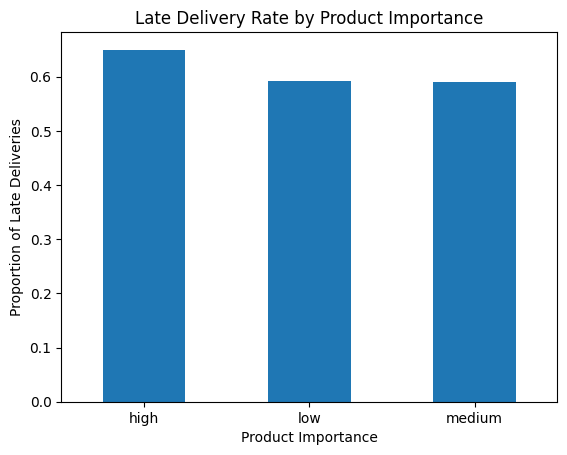

In [30]:
# Visualize late delivery rate by product importance
importance_delay.plot(kind='bar')
plt.title("Late Delivery Rate by Product Importance")
plt.ylabel("Proportion of Late Deliveries")
plt.xlabel("Product Importance")
plt.xticks(rotation=0)
plt.show()

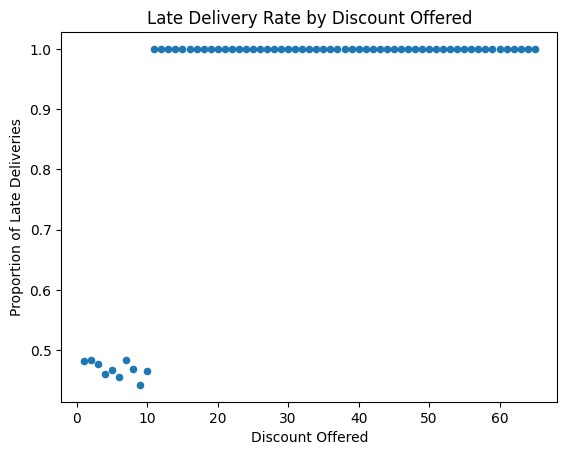

In [32]:
# Convert Series to DataFrame and reset index for plotting
discount_delay_df = discount_delay.reset_index()

# Plot scatter plot with DataFrame
discount_delay_df.plot(kind='scatter', x='discount_offered', y='reached_on_time_y_n')
plt.title("Late Delivery Rate by Discount Offered")
plt.xlabel("Discount Offered")
plt.ylabel("Proportion of Late Deliveries")
plt.show()

In [33]:
# .Check summary statistics for discounts on late vs. on-time orders

# .Group discount into bins (e.g., low, medium, high) and check late rates by group to smooth noise

# .Later, use the feature in the model and see if it improves predictions

# Define bins and labels
bins = [ -1, 20, 50, df['discount_offered'].max() ]  # -1 to include 0, 20 and 50 as cutoffs
labels = ['Low', 'Medium', 'High']

# Create a new column for discount bins
df['discount_bin'] = pd.cut(df['discount_offered'], bins=bins, labels=labels)

# Check distribution of discount bins
df['discount_bin'].value_counts()


discount_bin
Low       8848
Medium    1418
High       733
Name: count, dtype: int64

discount_bin
Low       0.498644
Medium    1.000000
High      1.000000
Name: reached_on_time_y_n, dtype: float64


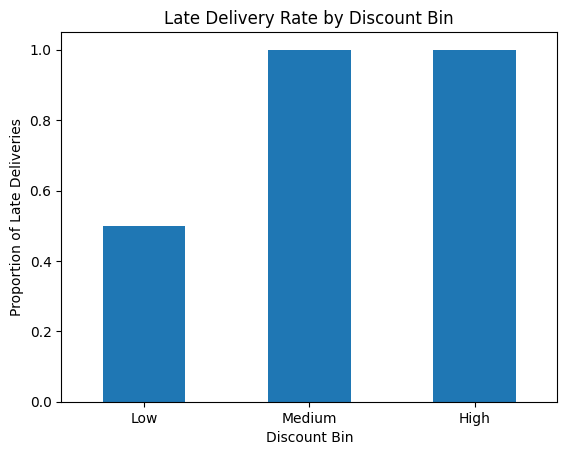

In [35]:
# Then analyze late delivery rate per bin:

# Late delivery rate by discount bin
discount_bin_delay = df.groupby('discount_bin', observed=True)['reached_on_time_y_n'].mean()

# Display rates
print(discount_bin_delay)

# Plot
discount_bin_delay.plot(kind='bar')
plt.title("Late Delivery Rate by Discount Bin")
plt.ylabel("Proportion of Late Deliveries")
plt.xlabel("Discount Bin")
plt.xticks(rotation=0)
plt.show()


In [36]:
# Drop ID (identifier) and raw discount (we use discount_bin instead)

df_model = df.drop(columns=['id', 'discount_offered'])

# Check columns
df_model.columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'weight_in_gms', 'reached_on_time_y_n',
       'discount_bin'],
      dtype='object')

In [37]:
#  — Encode categorical variables

from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding (order matters)
ordinal_cols = ['product_importance', 'discount_bin']
ordinal_encoder = OrdinalEncoder(
    categories=[['low', 'medium', 'high'], ['Low', 'Medium', 'High']]
)

df_model[ordinal_cols] = ordinal_encoder.fit_transform(df_model[ordinal_cols])

# One-hot encoding (order does NOT matter)
df_model = pd.get_dummies(
    df_model,
    columns=['warehouse_block', 'mode_of_shipment', 'gender'],
    drop_first=True
)

# Check result
df_model.head()

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,weight_in_gms,reached_on_time_y_n,discount_bin,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Road,mode_of_shipment_Ship,gender_M
0,4,2,177,3,0.0,1233,1,1.0,False,False,True,False,False,False,False
1,4,5,216,2,0.0,3088,1,2.0,False,False,False,True,False,False,True
2,2,2,183,4,0.0,3374,1,1.0,False,False,False,False,False,False,True
3,3,3,176,4,1.0,1177,1,0.0,True,False,False,False,False,False,True
4,2,2,184,3,1.0,2484,1,1.0,False,True,False,False,False,False,False


In [ ]:
#  — Add minimal engineered features

# 1️⃣ Cost × Weight interaction
df_model['cost_weight_interaction'] = (
    df['cost_of_the_product'] * df['weight_in_gms']
)

# 2️⃣ Customer pressure ratio (calls vs experience)
df_model['calls_per_prior_purchase'] = (
    df['customer_care_calls'] / (df['prior_purchases'] + 1)
)

# Check columns
df_model[['cost_weight_interaction', 'calls_per_prior_purchase']].head()


,cost_weight_interaction,calls_per_prior_purchase
0,218241,1.000000
1,667008,1.333333
2,617442,0.400000
3,207152,0.600000
4,457056,0.500000


In [39]:
#  — Define features and target

X = df_model.drop(columns='reached_on_time_y_n')
y = df_model['reached_on_time_y_n']

# Sanity check
X.shape, y.shape


((10999, 16), (10999,))

In [40]:
#  — Train / Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8799, 16), (2200, 16), (8799,), (2200,))

In [41]:
#  — Train Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)


/Users/akinsholaakinade/Desktop/ecommerce-delivery-prediction/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [42]:
# - Evaluate Logistic Regression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred_lr = log_reg.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Precision, Recall, F1
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.6545454545454545

Confusion Matrix:
[[557 330]
 [430 883]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.63      0.59       887
           1       0.73      0.67      0.70      1313

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.65      0.66      2200



In [43]:
# - Train Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [44]:
# STEP 11.4 — Evaluate Random Forest

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.6522727272727272

Confusion Matrix:
 [[595 292]
 [473 840]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.67      0.61       887
           1       0.74      0.64      0.69      1313

    accuracy                           0.65      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.65      0.66      2200



In [45]:
# -- Hyperparameter tuning of Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

In [47]:
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',   # IMPORTANT: prioritize catching late deliveries
    cv=5,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'class_weight': [None, 'balanced'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold an

In [48]:
# Best parameters
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [49]:
best_rf = grid_search.best_estimator_

In [89]:
import joblib
import os
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import sklearn

print(f"Current scikit-learn version: {sklearn.__version__}")

# Make sure models folder exists
os.makedirs("models", exist_ok=True)

# Delete old incompatible models if they exist
if os.path.exists("models/log_reg.pkl"):
    os.remove("models/log_reg.pkl")
    print("🗑️ Deleted old log_reg.pkl")

if os.path.exists("models/scaler.pkl"):
    os.remove("models/scaler.pkl")
    print("🗑️ Deleted old scaler.pkl")

# Re-create scaler from scratch
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train fresh Logistic Regression with current sklearn version
log_reg = LogisticRegression(
    max_iter=2000,
    random_state=42,
    solver='lbfgs',
    n_jobs=-1
)

log_reg.fit(X_train_scaled, y_train)

# Save everything
joblib.dump(log_reg, "models/log_reg.pkl")
joblib.dump(best_rf, "models/best_rf.pkl")
joblib.dump(ordinal_encoder, "models/ordinal_encoder.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(X_train.columns.tolist(), "models/feature_names.pkl")

# Verify
print("=" * 50)
print("✅ All models saved successfully with sklearn 1.8.0!")
print("=" * 50)
print(f"📊 Features: {len(X_train.columns)}")
print(f"📋 Feature names: {X_train.columns.tolist()}")
print("\n📁 Saved files:")
for f in os.listdir("models"):
    print(f"  ✅ {f}")

# Quick test
from sklearn.metrics import accuracy_score
y_pred_test = log_reg.predict(X_test_scaled)
print(f"\n🧪 Test accuracy: {accuracy_score(y_test, y_pred_test):.3f}")

Current scikit-learn version: 1.8.0
🗑️ Deleted old log_reg.pkl
🗑️ Deleted old scaler.pkl
✅ All models saved successfully with sklearn 1.8.0!
📊 Features: 16
📋 Feature names: ['customer_care_calls', 'customer_rating', 'cost_of_the_product', 'prior_purchases', 'product_importance', 'weight_in_gms', 'discount_bin', 'warehouse_block_B', 'warehouse_block_C', 'warehouse_block_D', 'warehouse_block_F', 'mode_of_shipment_Road', 'mode_of_shipment_Ship', 'gender_M', 'cost_weight_interaction', 'calls_per_prior_purchase']

📁 Saved files:
  ✅ scaler.pkl
  ✅ ordinal_encoder.pkl
  ✅ best_rf.pkl
  ✅ feature_names.pkl
  ✅ onehot_columns.pkl
  ✅ log_reg.pkl

🧪 Test accuracy: 0.659


/Users/akinsholaakinade/Desktop/ecommerce-delivery-prediction/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_rf_tuned = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))

Accuracy: 0.6609090909090909

Confusion Matrix:
 [[604 283]
 [463 850]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.68      0.62       887
           1       0.75      0.65      0.70      1313

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.68      0.66      0.66      2200



In [84]:
# - Chose Logistic Regression as the final model because it best meets the business KPI (recall for late deliveries).

# Get coefficients from the trained logistic regression model
coefficients = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': log_reg.coef_[0]
})

# Sort by absolute impact
coefficients['abs_coeff'] = coefficients['coefficient'].abs()
coefficients = coefficients.sort_values(by='abs_coeff', ascending=False)

coefficients.head(10)

,feature,coefficient,abs_coeff
6,discount_bin,5.155093,5.155093
15,calls_per_prior_purchase,0.860307,0.860307
9,warehouse_block_D,0.287747,0.287747
12,mode_of_shipment_Ship,0.236806,0.236806
0,customer_care_calls,-0.226186,0.226186
10,warehouse_block_F,0.200243,0.200243
11,mode_of_shipment_Road,0.196764,0.196764
7,warehouse_block_B,0.178319,0.178319
13,gender_M,0.162612,0.162612
3,prior_purchases,0.099632,0.099632


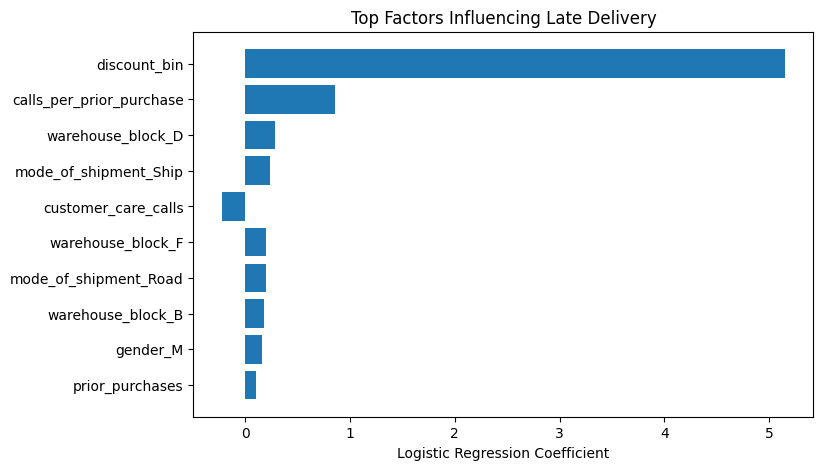

In [ ]:
# - Visualize top drivers

top_features = coefficients.head(10)

plt.figure(figsize=(8, 5))
plt.barh(top_features['feature'], top_features['coefficient'])
plt.xlabel("Logistic Regression Coefficient")
plt.title("Top Factors Influencing Late Delivery")
plt.gca().invert_yaxis()
plt.show()


In [56]:
# - Extract and Visualize Feature Importance from Random Forest

# Extract feature importance from the tuned Random Forest
importances = best_rf.feature_importances_
features = X_train.columns

feat_imp_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feat_imp_df.head(10)


,feature,importance
5,weight_in_gms,0.259088
14,cost_weight_interaction,0.178733
2,cost_of_the_product,0.148354
6,discount_bin,0.099135
1,customer_rating,0.051177
15,calls_per_prior_purchase,0.049090
3,prior_purchases,0.045848
0,customer_care_calls,0.035915
4,product_importance,0.028482
13,gender_M,0.020905


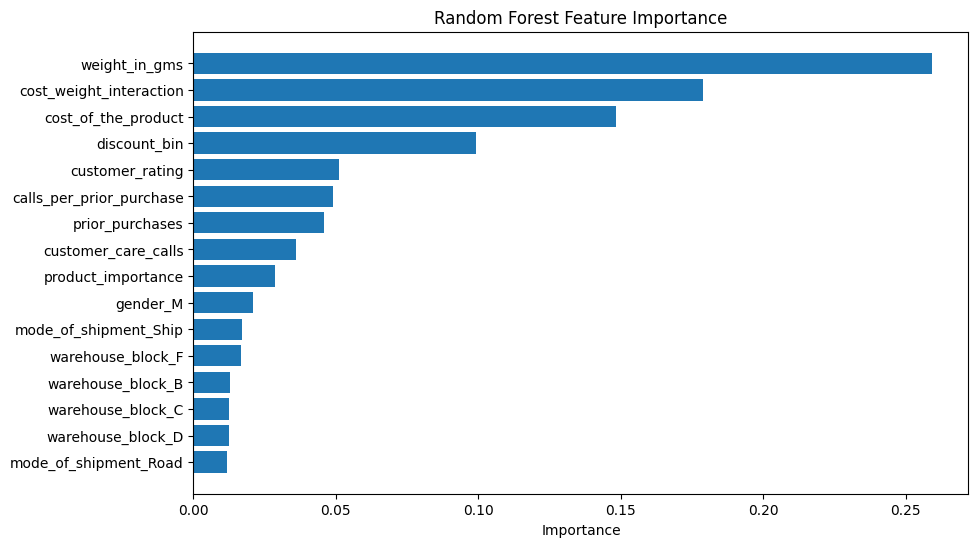

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'])
plt.gca().invert_yaxis()
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()

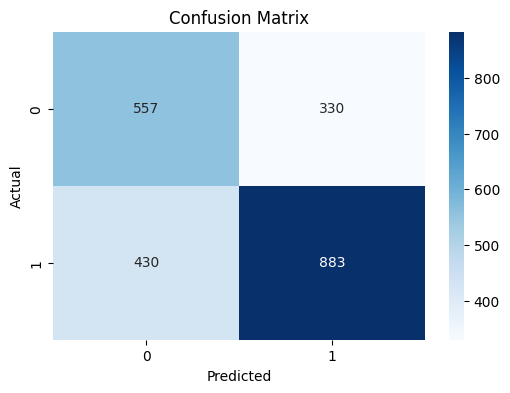

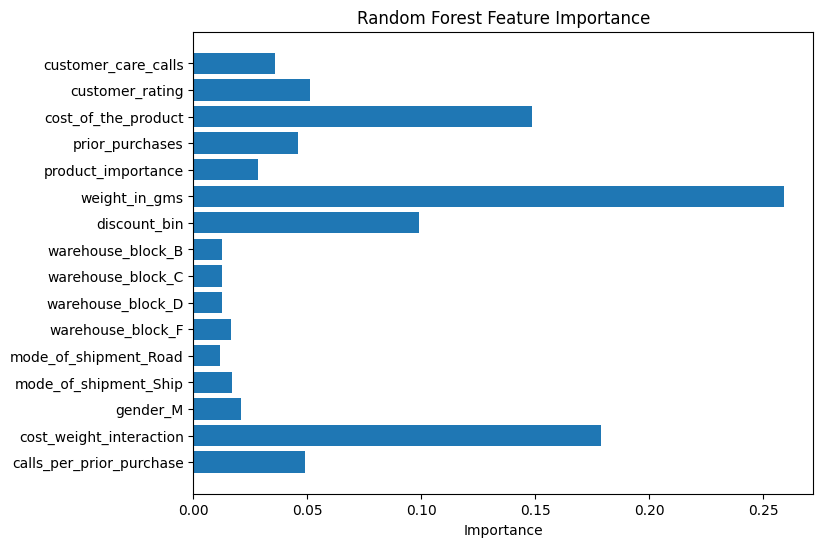

✅ Images saved successfully in: ./images


In [76]:
# ===============================
# ✅ Save Confusion Matrix & Feature Importance Images
# ===============================

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# --- 1️⃣ Ensure the images folder exists ---
images_dir = "./images"
os.makedirs(images_dir, exist_ok=True)

# --- 2️⃣ Confusion Matrix (Logistic Regression) ---
y_pred = log_reg.predict(X_test)  # your trained Logistic Regression
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Save safely
plt.savefig(os.path.join(images_dir, "confusion_matrix.png"), bbox_inches="tight")
plt.show()

# --- 3️⃣ Feature Importance (Random Forest) ---
feat_imp_df = pd.DataFrame({
    "feature": X_train.columns,         # features used in RF
    "importance": best_rf.feature_importances_  # your tuned RF
})

plt.figure(figsize=(8,6))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
# Save safely
plt.savefig(os.path.join(images_dir, "feature_importance.png"), bbox_inches="tight")
plt.show()

print("✅ Images saved successfully in:", images_dir)


In [87]:
# Quick verification cell
print("Variables still in memory:")
print(f"✅ X_train shape: {X_train.shape}")
print(f"✅ best_rf exists: {best_rf is not None}")
print(f"✅ log_reg exists: {log_reg is not None}")
print(f"✅ ordinal_encoder exists: {ordinal_encoder is not None}")

Variables still in memory:
✅ X_train shape: (8799, 16)
✅ best_rf exists: True
✅ log_reg exists: True
✅ ordinal_encoder exists: True


In [88]:
import sklearn
print(f"Scikit-learn version: {sklearn.__version__}")

Scikit-learn version: 1.8.0


In [90]:
import joblib
import os
import pickle

# Force save with protocol 4 (more compatible)
print("Re-saving with pickle protocol 4...")

# Load the model that's in memory
# (the one we just trained)

# Save with specific protocol
with open("models/log_reg.pkl", "wb") as f:
    pickle.dump(log_reg, f, protocol=4)

with open("models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f, protocol=4)

print("✅ Re-saved with pickle protocol 4")

# Verify it loads correctly
test_load = joblib.load("models/log_reg.pkl")
print(f"✅ Test load successful: {type(test_load)}")
print(f"✅ Has predict method: {hasattr(test_load, 'predict')}")
print(f"✅ Has predict_proba method: {hasattr(test_load, 'predict_proba')}")

Re-saving with pickle protocol 4...
✅ Re-saved with pickle protocol 4
✅ Test load successful: <class 'sklearn.linear_model._logistic.LogisticRegression'>
✅ Has predict method: True
✅ Has predict_proba method: True
